# Exploration

In [90]:
# import libraries

import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# data folder

data_folder = '../../data/demographics'

### Indicators

In [92]:
def visualize_indicator_distribution(indicator : pd.DataFrame):
    '''
    Plots the distribution of the respective indicator values
    '''
    numeric_columns = indicator.select_dtypes(include=['float64', 'int64']).columns
    ncols = 3
    nrows = int(np.ceil(len(numeric_columns) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 2.5 * nrows))
    axes = axes.flatten()
    for i, column in enumerate(numeric_columns):
        sns.stripplot(x=indicator[column], ax=axes[i], jitter=True, color='blue', alpha=0.7)
        axes[i].set_title(column)
        axes[i].set_xlabel('')
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

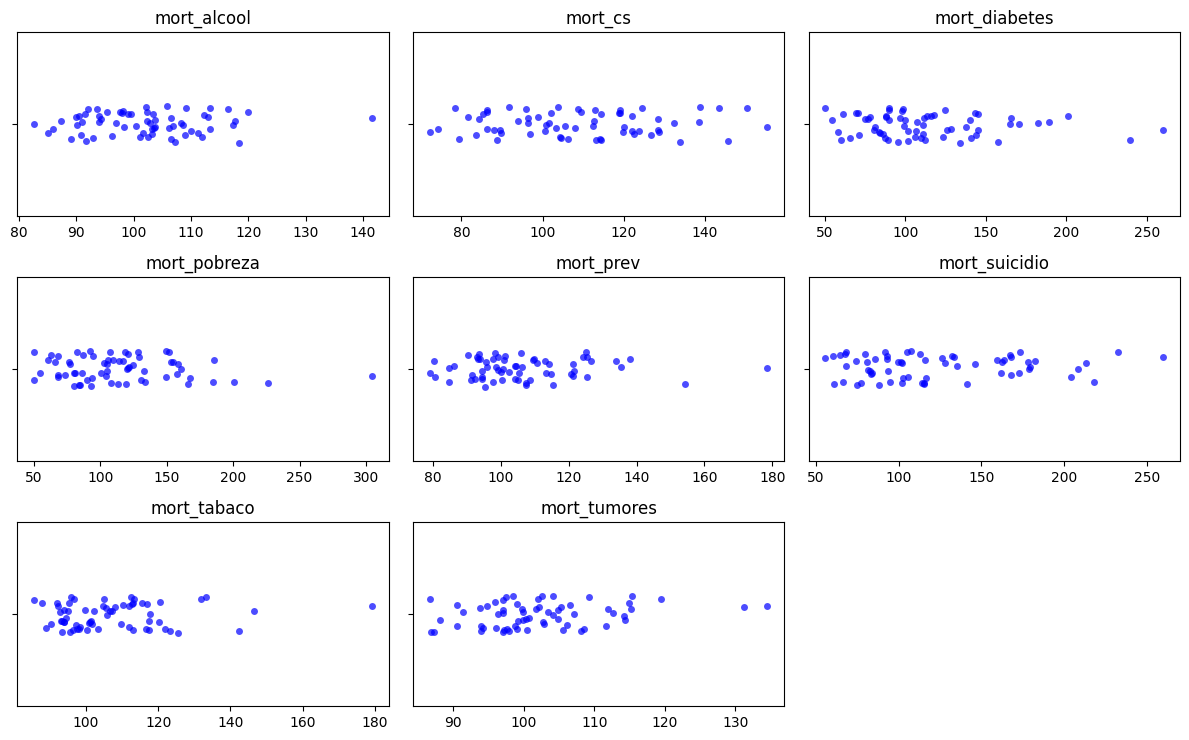

In [93]:
# mortality distributions

mortality = pd.read_csv(f"{data_folder}/raw/mortalidade.csv")
visualize_indicator_distribution(mortality)

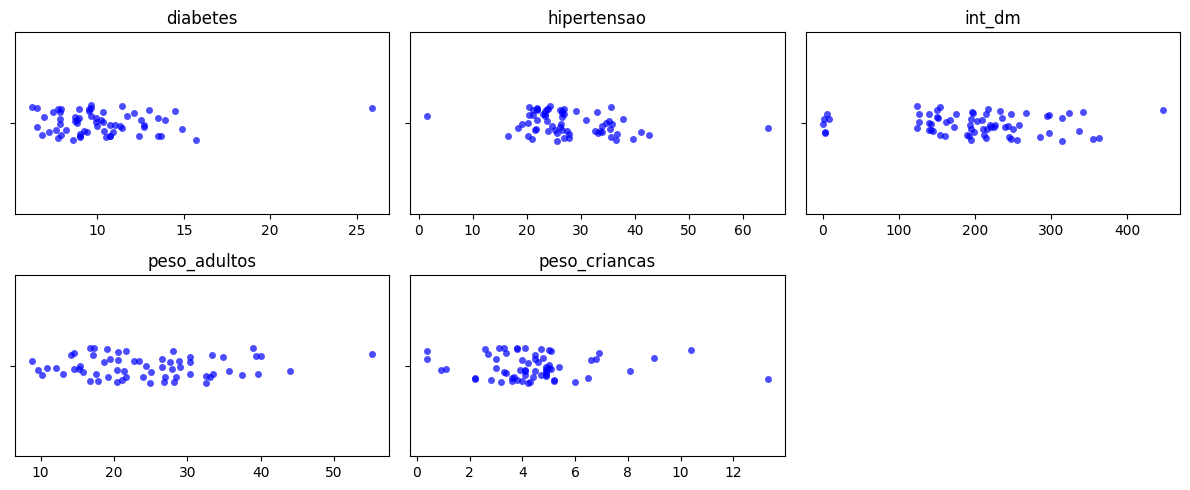

In [94]:
# morbidity distributions

morbidity = pd.read_csv(f"{data_folder}/raw/morbilidade.csv")
visualize_indicator_distribution(morbidity)

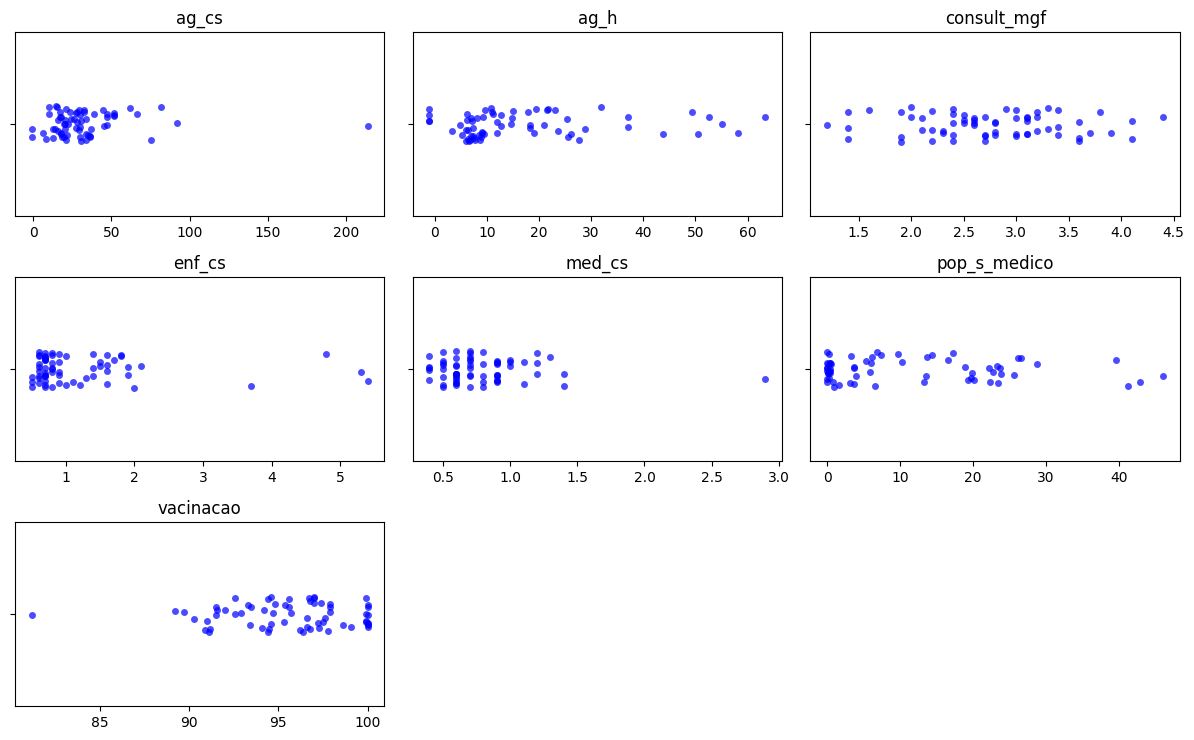

In [95]:
# healthcare distributions

healthcare = pd.read_csv(f"{data_folder}/raw/cuidados-saude.csv")
visualize_indicator_distribution(healthcare)

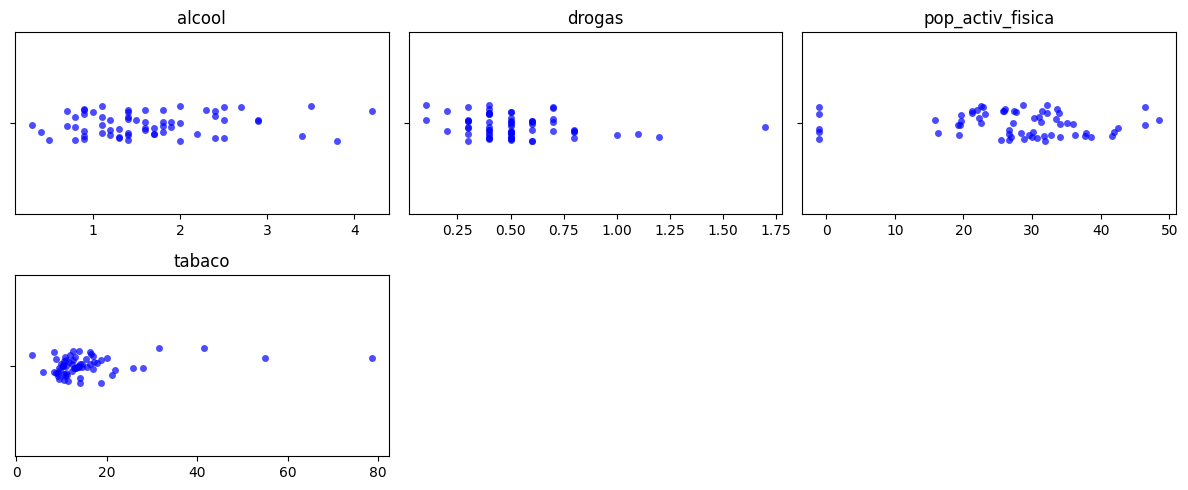

In [96]:
# lifestyle distributions

lifestyle = pd.read_csv(f"{data_folder}/raw/estilos-vida.csv")
visualize_indicator_distribution(lifestyle)

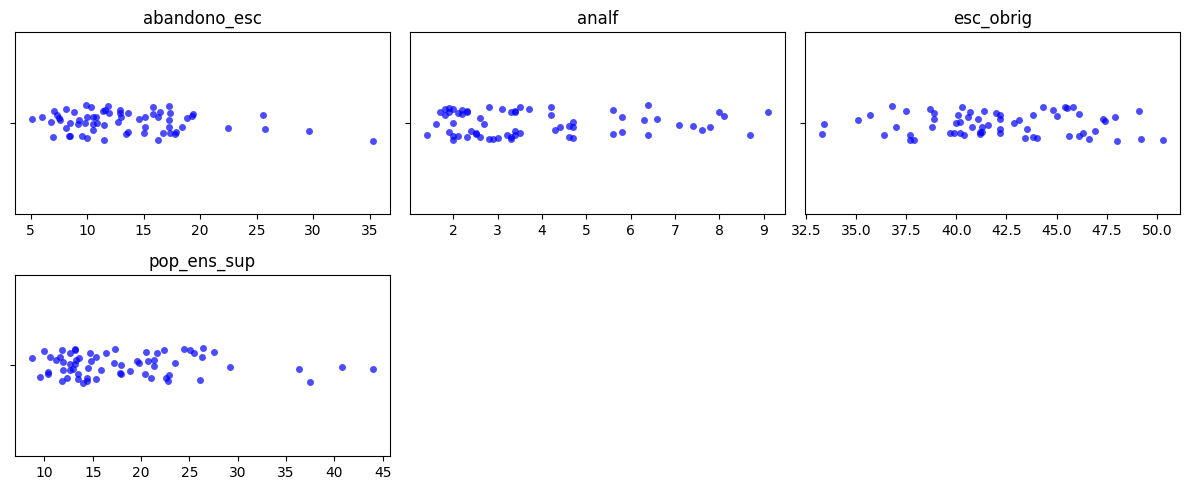

In [97]:
# education distributions

education = pd.read_csv(f"{data_folder}/raw/educacao.csv")
visualize_indicator_distribution(education)

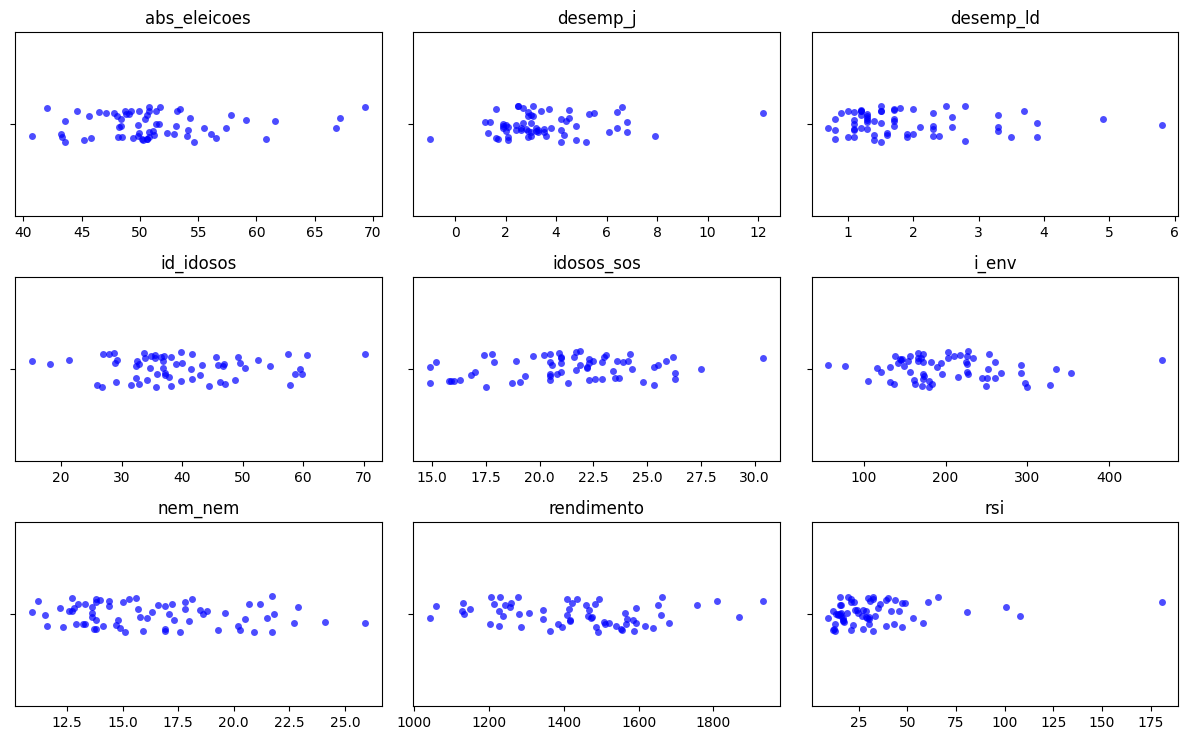

In [98]:
# socioeconomic distributions

socioeconomic = pd.read_csv(f"{data_folder}/raw/economico-social.csv")
visualize_indicator_distribution(socioeconomic)

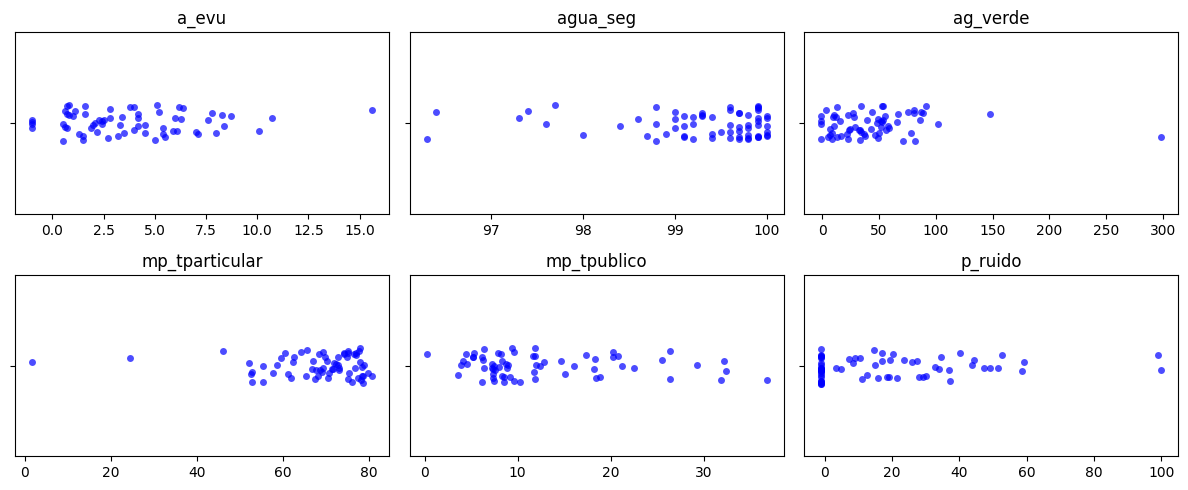

In [99]:
# environment distributions

environment = pd.read_csv(f"{data_folder}/raw/ambiente-fisico.csv")
visualize_indicator_distribution(environment)

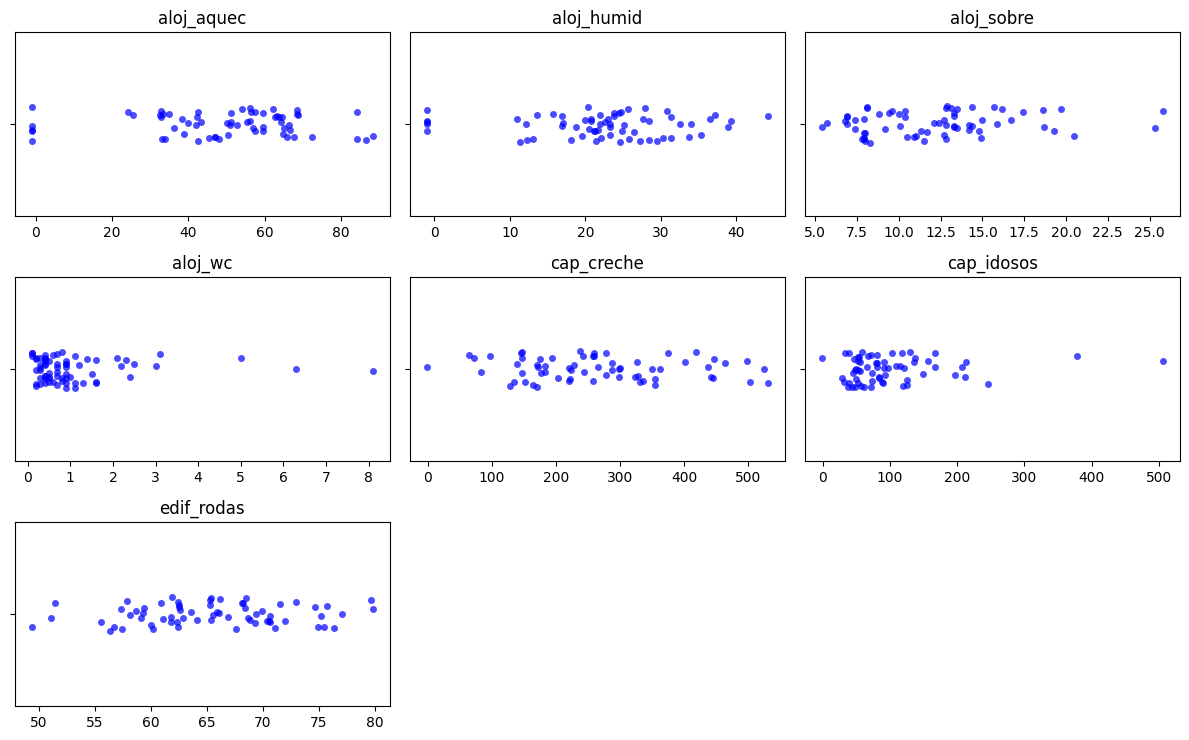

In [100]:
# infrastructure distributions

infrastructure = pd.read_csv(f"{data_folder}/raw/ambiente-construido.csv")
visualize_indicator_distribution(infrastructure)

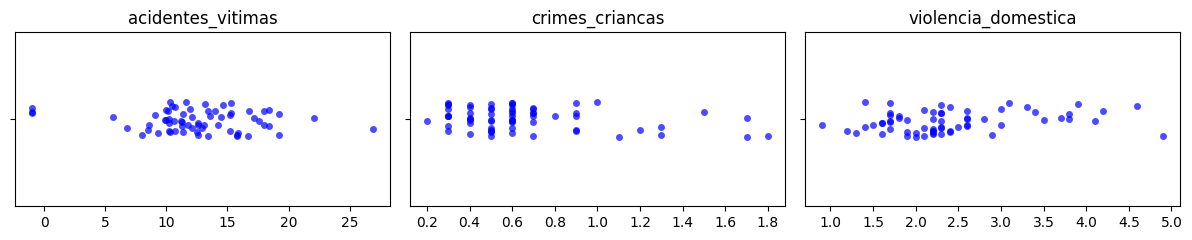

In [101]:
# security distributions

security = pd.read_csv(f"{data_folder}/raw/seguranca.csv")
visualize_indicator_distribution(security)

### Population

In [102]:
# load population data

with open(f"{data_folder}/population/country.json", 'r') as file:
    country = json.load(file)

with open(f"{data_folder}/population/municipalities.json", 'r', encoding='utf-8') as file:
    municipalities = json.load(file)

with open(f"{data_folder}/population/life_insurance.json", 'r') as file:
    life_insurance = json.load(file)

with open(f"{data_folder}/population/occupations.json", 'r') as file:
    occupations = json.load(file)

with open(f"{data_folder}/population/social_media.json", 'r') as file:
    social_media = json.load(file)

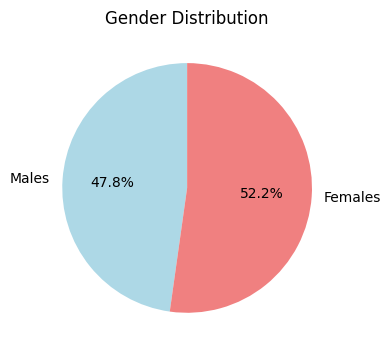

In [103]:
# population distribution by gender

total_population = country['total']
male_population = country['males']
female_population = country['females']

plt.figure(figsize=(4, 4))
gender_labels = ['Males', 'Females']
gender_values = [male_population, female_population]
plt.pie(gender_values, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

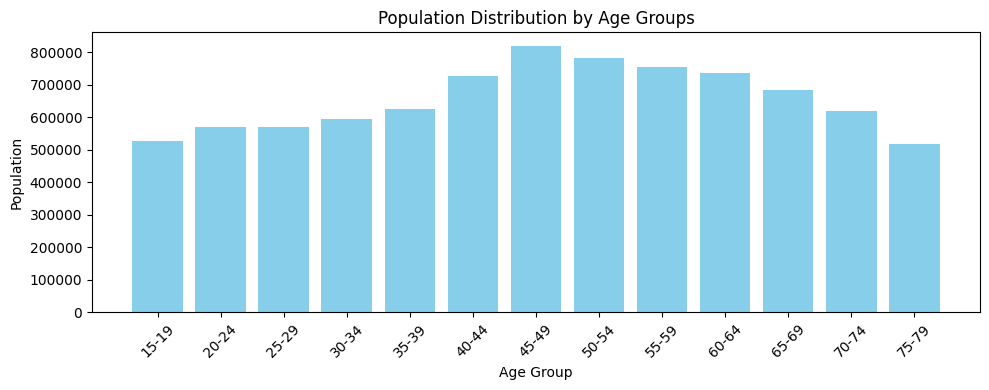

In [104]:
# population distribution by age

age_groups = country['age_groups']
age_ranges = [f"{group['from']}-{group['to']}" for group in age_groups]
population_values = [group['value'] for group in age_groups]

plt.figure(figsize=(10, 4))
plt.bar(age_ranges, population_values, color='skyblue')
plt.title('Population Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
# total amount of municipalities included

num_municipalities = len(municipalities)

print(f"Included municipalities: {num_municipalities}")

Included municipalities: 70


In [106]:
# total population from included municipalities

municipalities_population = sum(municipalities.values())

print(f"Total population of all included municipalities: {municipalities_population}")

Total population of all included municipalities: 4110926


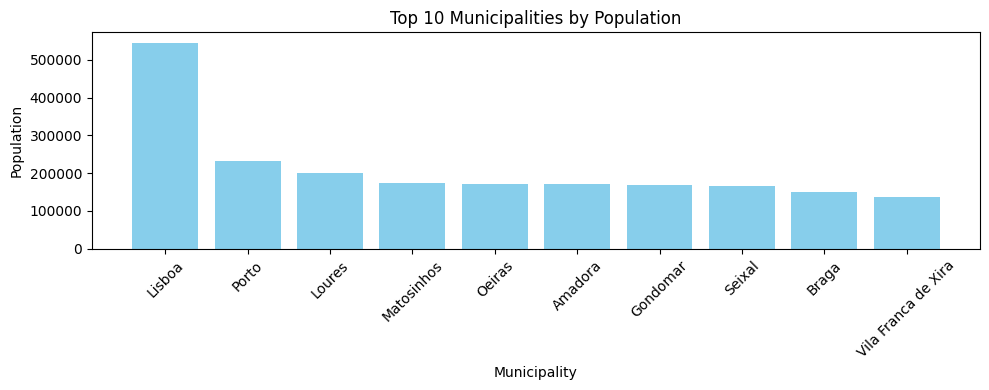

In [107]:
# top 10 municipalities by population

names = list(municipalities.keys())
populations = list(municipalities.values())

top_n = 10
top_municipalities = sorted(zip(names, populations), key=lambda x: x[1], reverse=True)[:top_n]
top_names = [x[0] for x in top_municipalities]
top_populations = [x[1] for x in top_municipalities]

plt.figure(figsize=(10, 4))
plt.bar(top_names, top_populations, color='skyblue')
plt.title(f'Top {top_n} Municipalities by Population')
plt.xlabel('Municipality')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

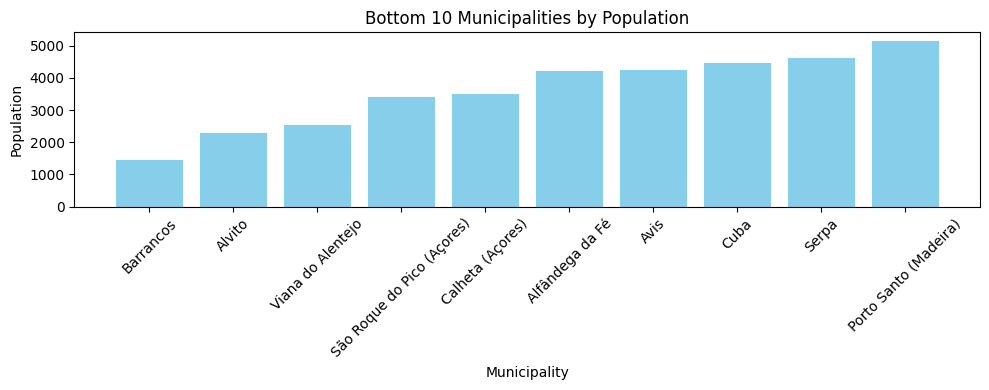

In [108]:
# bottom 10 municipalities by population

bottom_n = 10
bottom_municipalities = sorted(zip(names, populations), key=lambda x: x[1])[:bottom_n]
bottom_names = [x[0] for x in bottom_municipalities]
bottom_populations = [x[1] for x in bottom_municipalities]

plt.figure(figsize=(10, 4))
plt.bar(bottom_names, bottom_populations, color='skyblue')
plt.title(f'Bottom {bottom_n} Municipalities by Population')
plt.xlabel('Municipality')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# life insurance adherence

life_percentage = life_insurance['total_percentage']

print(f"Total population with life insurance: {life_percentage:.0%}")

Total population with life insurance: 19%


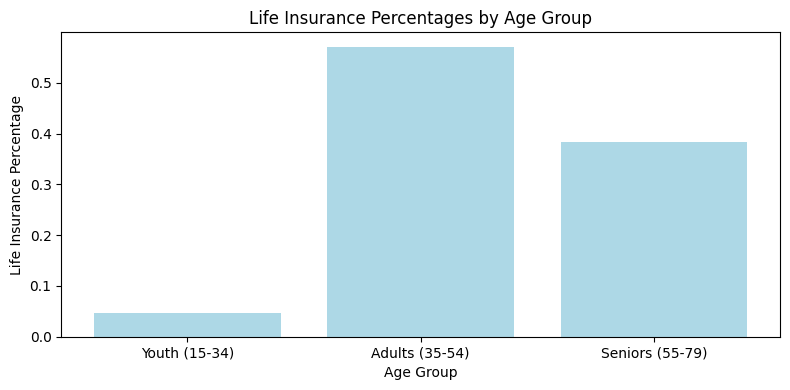

In [110]:
# life insurance adherence by age group

age_groups = ['Youth (15-34)', 'Adults (35-54)', 'Seniors (55-79)']
percentages = [
    life_insurance['youth']['percentage'], 
    life_insurance['adults']['percentage'], 
    life_insurance['seniors']['percentage']
]

plt.figure(figsize=(8, 4))
plt.bar(age_groups, percentages, color='lightblue')
plt.title('Life Insurance Percentages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Life Insurance Percentage')
plt.tight_layout()
plt.show()

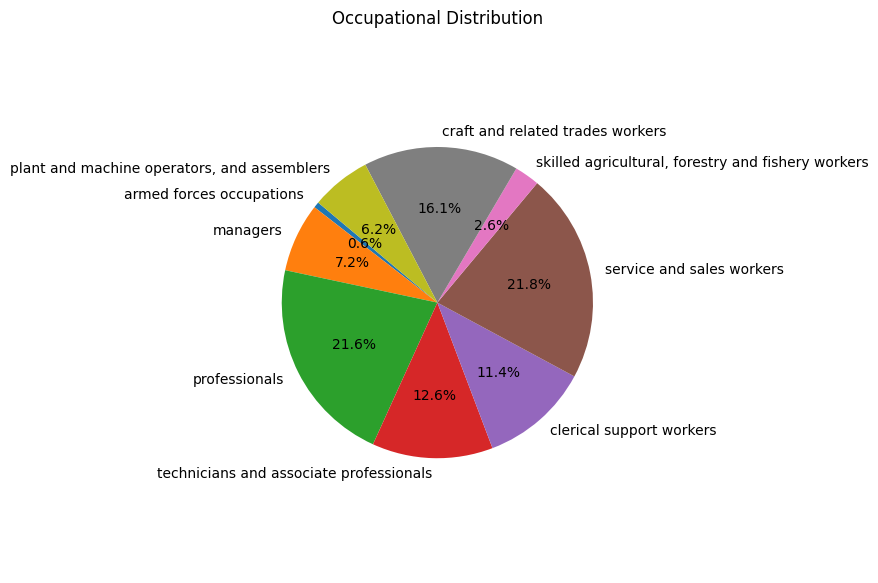

In [111]:
# occupational distribution

categories = []
values = []

for category, data in occupations.items():
    if category != "population":
        categories.append(category)
        values.append(data["population"])

plt.figure(figsize=(8, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Occupational Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [112]:
# average daily steps per category

average_steps = {}
for category, data in occupations.items():
    steps = data["steps"]
    average_steps[category] = round(np.mean(list(steps.values())))

for category, average in average_steps.items():
    print(f"{category}: {average}")

armed forces occupations: 4781
managers: 3514
professionals: 5884
technicians and associate professionals: 4740
clerical support workers: 3862
service and sales workers: 6304
skilled agricultural, forestry and fishery workers: 6305
craft and related trades workers: 5324
plant and machine operators, and assemblers: 4250


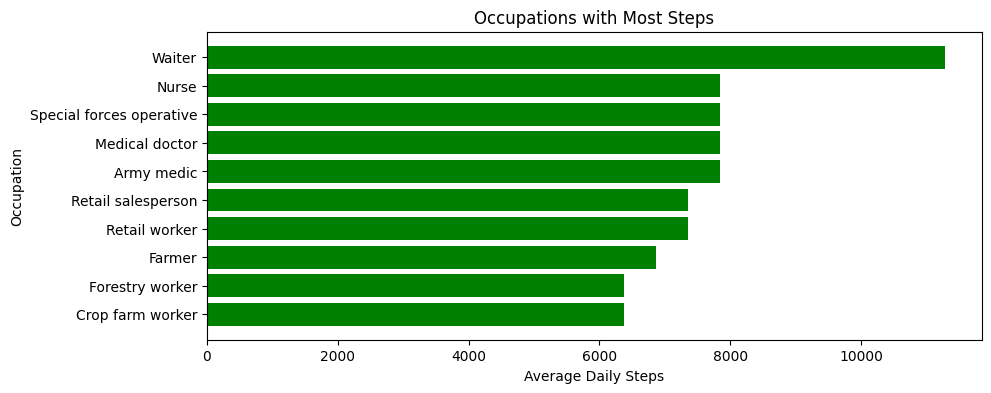

In [113]:
# top 10 occupations by daily steps

occupation_names = []
step_counts = []
    
for category, data in occupations.items():
    for occupation, steps in data["steps"].items():
        occupation_names.append(occupation)
        step_counts.append(steps)

n = 10

sorted_indices = np.argsort(step_counts)[-n:][::-1]
top_n_occupations = np.array(occupation_names)[sorted_indices]
top_n_steps = np.array(step_counts)[sorted_indices]
    
plt.figure(figsize=(10, 4))
plt.barh(top_n_occupations, top_n_steps, color='green')
plt.xlabel("Average Daily Steps")
plt.ylabel("Occupation")
plt.title(f"Occupations with Most Steps")
plt.gca().invert_yaxis() 
plt.show()

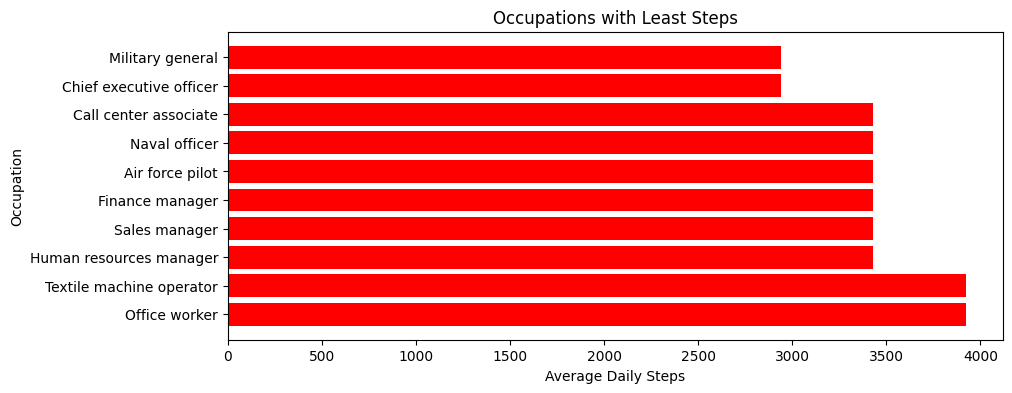

In [114]:
# bottom 10 occupations by daily steps

sorted_indices = np.argsort(step_counts)[:n]
bottom_n_occupations = np.array(occupation_names)[sorted_indices]
bottom_n_steps = np.array(step_counts)[sorted_indices]
    
plt.figure(figsize=(10, 4))
plt.barh(bottom_n_occupations, bottom_n_steps, color='red')
plt.xlabel("Average Daily Steps")
plt.ylabel("Occupation")
plt.title(f"Occupations with Least Steps")
plt.gca().invert_yaxis() 
plt.show()

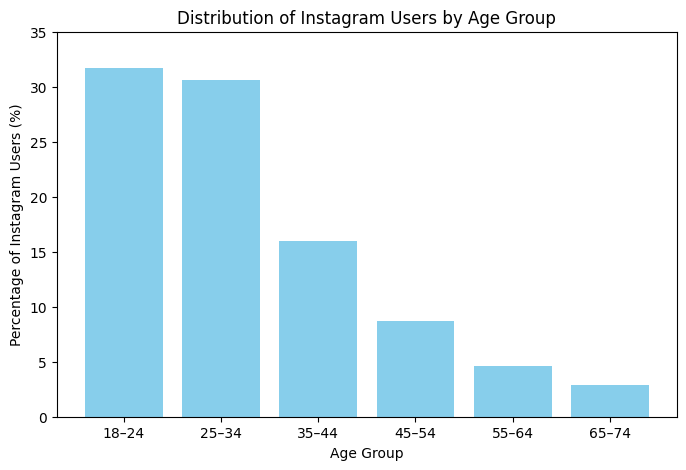

In [115]:
# distribution of instagram users by age group

age_groups = [f"{group['from']}–{group['to']}" for group in social_media]
percentages = [group['percentage'] * 100 for group in social_media]

plt.figure(figsize=(8, 5))
plt.bar(age_groups, percentages, color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Percentage of Instagram Users (%)")
plt.title("Distribution of Instagram Users by Age Group")
plt.ylim(0, 35)
plt.show()